# 5.1.4b F-scores

**Propósito:** $\;$ establecer una única medida que evalúe adecuadamente la calidad de cualquier par precisión-cobertura

**F-scores:** $\quad F_{\beta}\,$ con $\,\beta\geq 0\,$ se propone como adecuada para un usuario que da $\beta$ veces más importancia a la cobertura que a la precisión
$$F_{\beta}=(1+\beta^2)\,\frac{\mathcal{P}\,\mathcal{R}}{\beta^2\mathcal{P}+\mathcal{R}}%
\qquad\text{o}\qquad%
\frac{1}{F_{\beta}}=\frac{1}{1+\beta^2}\,\frac{1}{\mathcal{P}}+\frac{\beta^2}{1+\beta^2}\,\frac{1}{\mathcal{R}}$$

**Casos particulares en función de la $\beta$:**
* **$\beta=0$:** $\;$ da nula importancia a la cobertura frente a la precisión; de hecho, $\,F_0=\mathcal{P}$
* **$\beta=0.5$:** $\;$ da la mitad de importancia a la cobertura que a la precisión
* **$\beta=1$:** $\;$ da la misma importancia a la cobertura que a la precisión y coincide con la **media armónica** de ambas
$$F_1=2\,\frac{\mathcal{P}\,\mathcal{R}}{\mathcal{P}+\mathcal{R}}=\frac{2}{\frac{1}{\mathcal{R}}+\frac{1}{\mathcal{P}}}$$
* **$\beta=2$:** $\;$ da el doble de importancia a la cobertura que a la precisión
* **$\beta\to\infty$:** $\;$ da infinita importancia a la cobertura frente a la precisión
$$\lim_{\beta\to\infty} F_{\beta}%
=\lim_{\beta\to\infty} \frac{\mathcal{P}\,\mathcal{R}}{\beta^2\mathcal{P}+\mathcal{R}}%
+\lim_{\beta\to\infty} \frac{\mathcal{P}\,\mathcal{R}}{\mathcal{P}+\frac{\mathcal{R}}{\beta^2}}=\mathcal{R}$$

**Comparación gráfica:** $\;F_{\beta}$ en función de $\mathcal{P}$ y $\mathcal{R}$, para $\beta\in(1, 0.5, 2);\,$ también media aritmética

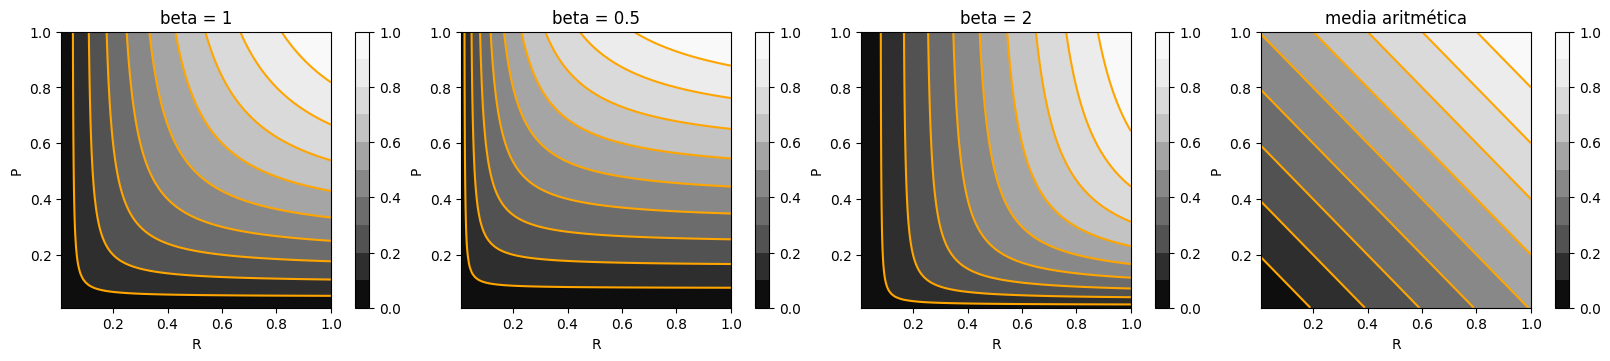

In [1]:
import numpy as np; import matplotlib.pyplot as plt
R, P = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))
RP = np.c_[np.ravel(R), np.ravel(P)]
B = (1, 0.5, 2); nrows = 1; ncols = len(B) + 1 # len(B) plots de F + plot de media
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 14*nrows/ncols), constrained_layout=True)
for ax, b in zip(axs.flat[:-1], B):
    bsquared = np.square(b)
    F = lambda rp: (1 + bsquared) * rp.prod() / ( bsquared * rp[1] + rp[0] )
    FF = np.apply_along_axis(F, 1, RP)
    ax.set_title(f"beta = {b}"); ax.set_xlabel('R'); ax.set_ylabel('P')
    ax.contour(R, P, FF.reshape(R.shape), 10, colors='orange', linestyles='solid')
    cp = ax.contourf(R, P, FF.reshape(R.shape), 10, cmap='Greys_r');
    plt.colorbar(cp, ax=ax)
ax = axs.flat[-1]; A = RP.mean(axis = 1)
ax.set_title(f"media aritmética"); ax.set_xlabel('R'); ax.set_ylabel('P')
ax.contour(R, P, A.reshape(R.shape), 10, colors='orange', linestyles='solid')
cp = ax.contourf(R, P, A.reshape(R.shape), 10, cmap='Greys_r'); plt.colorbar(cp, ax=ax);

**Observaciones que se derivan de la comparación gráfica:**
* **$F_1$:** $\;$ sus curvas de nivel son simétricas respecto a la diagonal, por lo que precisión y cobertura contribuyen con la misma importancia, si bien ambas deben ser elevadas para que $F_1$ también lo sea
* **$F_{\beta}$ con $\beta<1$, por ejemplo $\beta=0.5$:** $\;$ las curvas de nivel de $F_{\beta}$ tiende a horizontalizarse, esto es, $F_{\beta}$ se aproxima a la precisión
* **$F_{\beta}$ con $\beta>1$, por ejemplo $\beta=2$:** $\;$ las curvas de nivel $F_{\beta}$ tienden a verticalizarse, por lo que $F_{\beta}$ se aproxima a la cobertura
* **Media aritmética:** $\;$ se asemeja a la armónica ($F_1$) en términos de simetría respecto a la diagonal, pero no requiere que precisión y cobertura sean elevadas para alcanzar valores relativamente altos; en particular, puede alcanzar valores próximos a $0.5$ con coberturas próximas a $1$ y precisiones prácticamente nulas, cosa que no suele tener interés práctico

**Macro-averaging:** $\;$ en clasificación abierta, promediado simple de F-scores, bien como media aritmética de F-scores de clase, o como F-score de las de las medias aritméticas de precisión y cobertura a nivel de clase

**Micro-averaging:** $\;$ en clasificación abierta, promediado de F-scores ponderado con los priors de las clases